In [38]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#plt.rcParams["animation.html"] = "jshtml"
from IPython.display import Image
plt.rcParams["figure.dpi"] = 50
import time

import imageio

In [55]:
# Slow: 

# Frames: 200
# Time to build animation: 140 seconds

# Frames: 400
# Time to build animation: 509 seconds

# Why is it nonlinear?

def make_animation(psi, filename):
    t0 = time.time()
    fig,ax = plt.subplots(figsize=(5,5),dpi=50)
    fig.clear()
    b = Bloch(fig=fig)

    def update(n):
        sx = expect(sigmax(),psi[n])
        sy = expect(sigmay(),psi[n])
        sz = expect(sigmaz(),psi[n])
        if n==0:
            b.add_vectors([sx,sy,sz])
        else:
            b.vectors[0] = [sx,sy,sz]
        b.add_points([sx,sy,sz])
        b.points[-1]
        b.make_sphere()
    
    def init():
        b.point_color = ["g"]
        b.point_marker = ["o"]

    anim = animation.FuncAnimation(fig, update, init_func=init, frames=len(psi), interval=100)
    plt.close(fig)
    anim.save(filename, fps=20)
    print("Frames: %d" % len(psi))
    dt = time.time() - t0
    print("Time to build animation: %d min %d seconds" % (dt//60, dt%60))

In [52]:
# Slower...but do get a progress bar. 

# Frames: 200
# Time to build animation: 3 min 8 seconds

# Frames: 400
# Time to build animation: 11 min 3 seconds
    
# And also nonlinear :(

def make_animation2(psi, filename):
    t0 = time.time()
    fig,ax = plt.subplots(figsize=(5,5),dpi=50)
    fig.clear()
    b = Bloch(fig=fig)

    def update(n):
        sx = expect(sigmax(),psi[n])
        sy = expect(sigmay(),psi[n])
        sz = expect(sigmaz(),psi[n])
        if n==0:
            b.add_vectors([sx,sy,sz])
        else:
            b.vectors[0] = [sx,sy,sz]
        b.add_points([sx,sy,sz])
        b.points[-1]
        b.make_sphere()
    
    b.point_color = ["g"]
    b.point_marker = ["o"]
    images = []
    for n in range(len(psi)):
        print("%d" % n,end="\r")
        update(n)
        b.save("tmp.png")
        images.append(imageio.imread(filename))
    imageio.mimsave(filename, images, duration=100)
    
    print()
    print("Frames: %d" % len(psi))
    dt = time.time() - t0
    print("Time to build animation: %d min %d seconds" % (dt//60, dt%60))

# Decay

In [57]:
H = 1 * sigmaz() 
psi0 = (basis(2,0) + basis(2,1)).unit()
c_ops = 0.2 * sigmam()
t = np.linspace(0,50,400)
result = mesolve(H, psi0, t, c_ops)
rho = result.states

filename="decay_from_superposition.gif"

In [58]:
make_animation(rho,"decay_from_superposition.gif")

Frames: 400
Time to build animation: 8 min 28 seconds


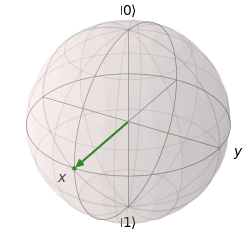

In [59]:
Image(filename)

# Dephasing

From wikipedia (todo: make my own in qutip...)

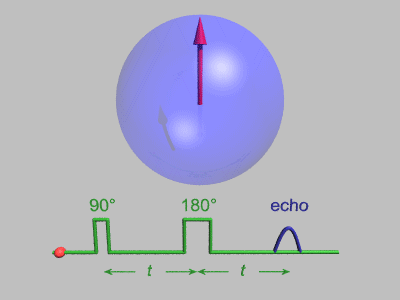